In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc


# Supervised Models

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# XGBoost & LightGBM

In [3]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Unsupervised Models

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neural_network import MLPRegressor


# Graph-based

In [5]:
from sklearn.neighbors import NearestNeighbors

In [12]:
# ✅ Load the dataset

import os

# Check your current working directory (helps locate the dataset)
print("Current directory:", os.getcwd())

# Try loading the dataset (adjust the path if needed)
df = pd.read_csv(r"C:\Users\pavit\OneDrive\Documents\Zidio Internship Projects\Financial Fraud Detection\creditcard.csv")

# Basic info
print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)

# Check class distribution (0 = non-fraud, 1 = fraud)
print("\nClass distribution:")
print(df['Class'].value_counts())



Current directory: c:\Users\pavit\OneDrive\Documents\Zidio Internship Projects\Financial Fraud Detection\PROJECT 2 - FINANCIAL FRAUD DETECTION
✅ Dataset loaded successfully!
Shape of dataset: (284807, 31)

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [13]:
print("\n📊 Dataset Info:")
print(df.info())

print("\n🔎 Missing Values:")
print(df.isnull().sum().sum())



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float6

# Fraud vs Non-Fraud Count

C:\Users\pavit\AppData\Local\Temp\ipykernel_15560\3360196926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=df, palette="Set2")


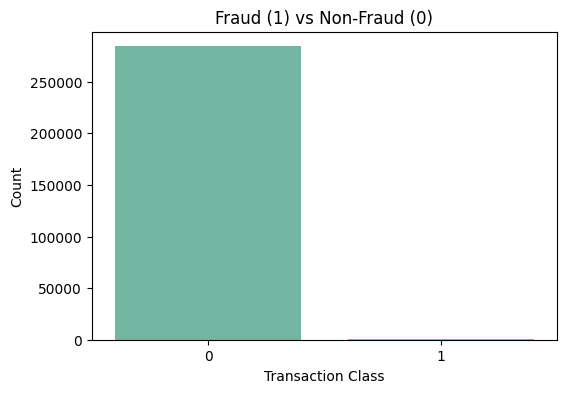

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=df, palette="Set2")
plt.title("Fraud (1) vs Non-Fraud (0)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()



# Transaction Amount distribution

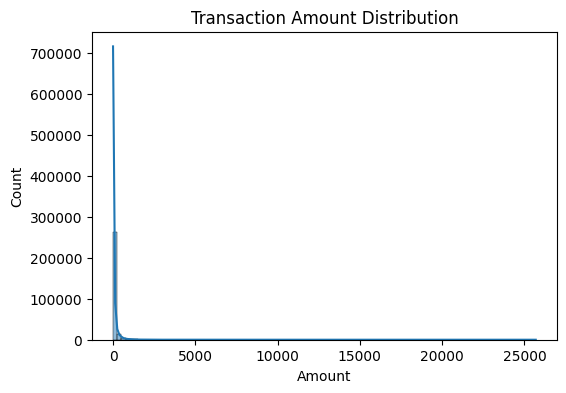

In [32]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Amount"], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

# Correlation heatmap

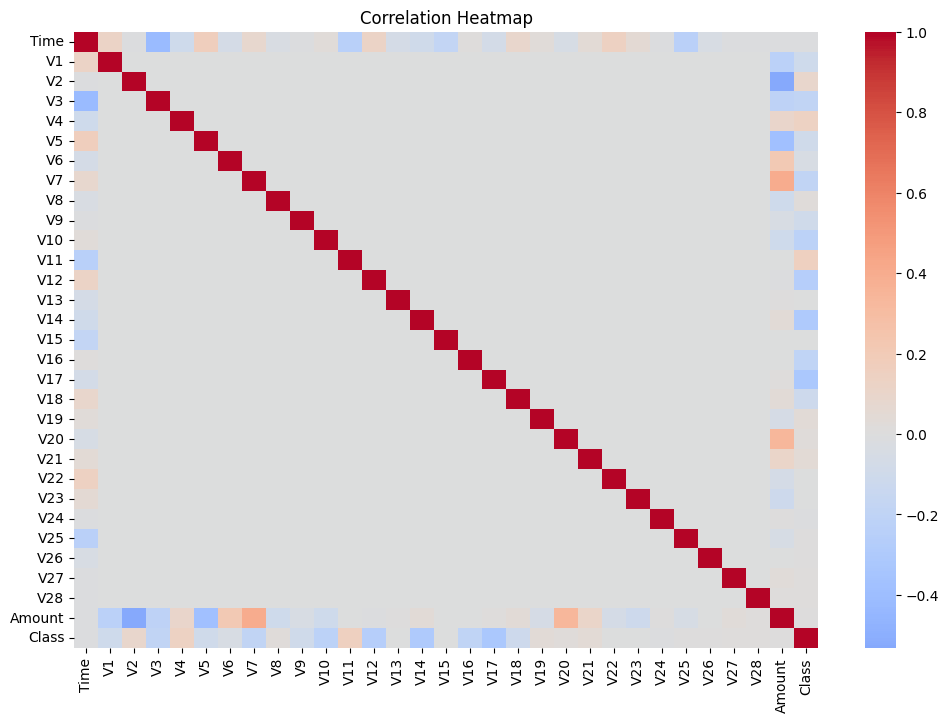

In [33]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Scaling (important for some models)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {}

# 🟢 Supervised Models

# --- Logistic Regression ---

In [ ]:
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
log_reg.fit(X_train_scaled, y_train)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
results["Logistic Regression"] = roc_auc_score(y_test, y_pred_proba)


# --- Decision Tree ---

In [ ]:
dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dt.fit(X_train, y_train)
y_pred_proba = dt.predict_proba(X_test)[:, 1]
results["Decision Tree"] = roc_auc_score(y_test, y_pred_proba)


# --- Random Forest ---

In [ ]:
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
results["Random Forest"] = roc_auc_score(y_test, y_pred_proba)


# --- Gradient Boosting ---

In [22]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_proba = gb.predict_proba(X_test)[:, 1]
results["Gradient Boosting"] = roc_auc_score(y_test, y_pred_proba)


# --- XGBoost ---

In [23]:
xgb = XGBClassifier(
    n_estimators=200, max_depth=5, learning_rate=0.05, scale_pos_weight=10, random_state=42
)
xgb.fit(X_train, y_train)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
results["XGBoost"] = roc_auc_score(y_test, y_pred_proba)


# --- LightGBM ---

In [24]:
lgb = LGBMClassifier(
    n_estimators=200, max_depth=-1, learning_rate=0.05, scale_pos_weight=10, random_state=42
)
lgb.fit(X_train, y_train)
y_pred_proba = lgb.predict_proba(X_test)[:, 1]
results["LightGBM"] = roc_auc_score(y_test, y_pred_proba)

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339


# 🔵 Unsupervised Models

# --- Isolation Forest ---

In [25]:
iso = IsolationForest(contamination=0.001, random_state=42)
iso.fit(X_train_scaled)
y_pred = iso.predict(X_test_scaled)
y_pred = np.where(y_pred == -1, 1, 0)
results["Isolation Forest"] = roc_auc_score(y_test, y_pred)


# --- One-Class SVM ---

In [26]:
ocsvm = OneClassSVM(nu=0.001, kernel="rbf", gamma=0.01)
ocsvm.fit(X_train_scaled[y_train == 0])
y_pred = ocsvm.predict(X_test_scaled)
y_pred = np.where(y_pred == -1, 1, 0)
results["One-Class SVM"] = roc_auc_score(y_test, y_pred)

# --- Autoencoder (MLP) ---

In [27]:
autoenc = MLPRegressor(hidden_layer_sizes=(30, 10, 30), max_iter=20, random_state=42)
autoenc.fit(X_train_scaled[y_train == 0], X_train_scaled[y_train == 0])
reconstructions = autoenc.predict(X_test_scaled)
mse = np.mean(np.square(X_test_scaled - reconstructions), axis=1)
results["Autoencoder"] = roc_auc_score(y_test, mse)

C:\Users\pavit\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


# 🟣 Graph-Based Model

# --- kNN fraud score ---

In [28]:
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_train_scaled)
distances, indices = knn.kneighbors(X_test_scaled)
# Calculate fraud rates by taking the mean of y_train for the k nearest neighbors for each test sample
fraud_rates = np.array([y_train.iloc[idx].mean() for idx in indices])
results["Graph-Based kNN"] = roc_auc_score(y_test, fraud_rates)

# 📊 Results

In [29]:
print("\nROC-AUC Scores:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")



ROC-AUC Scores:
Logistic Regression: 0.9721
Decision Tree: 0.8619
Random Forest: 0.9529
Gradient Boosting: 0.3469
XGBoost: 0.9732
LightGBM: 0.8937
Isolation Forest: 0.6272
One-Class SVM: 0.8305
Autoencoder: 0.9391
Graph-Based kNN: 0.9437


📈 Precision-Recall Curves

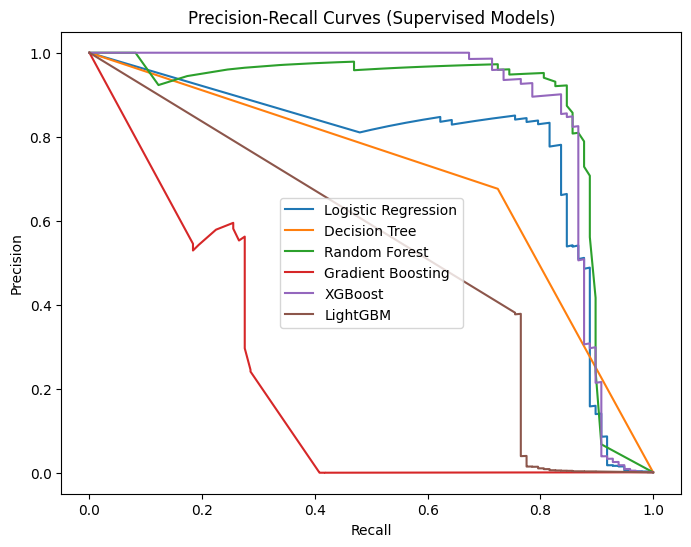

In [30]:
plt.figure(figsize=(8, 6))
for name, model in [("Logistic Regression", log_reg), ("Decision Tree", dt),
                    ("Random Forest", rf), ("Gradient Boosting", gb),
                    ("XGBoost", xgb), ("LightGBM", lgb)]:
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if name == "Logistic Regression" \
        else model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves (Supervised Models)")
plt.legend()
plt.show()